In [3]:
from class_magnesium_not_drop_na import *

### Max depth

In [13]:
md = list(range(1,11)) + [15, 20, 25, 30, 35]

In [14]:
test = []
train = []
cnf = []
for i in md:
    print()
    print('Maxdepth = ',i)
    m = Magnesium("set_minresol_N_5.csv", fold='input files/',colours = ['#f6c35b', '#929292'],
                 model = RandomForestClassifier(n_estimators=200, max_depth = i, n_jobs=-1, criterion='gini'),
                  with_groups = False)
    data = m.compute(n_splits = 5, test_size = 0.3, plots = False, reduce_features = False, balanced = True)
    train.append(data['train score'])
    test.append(data['test score'])
    cnf.append(data['confusion'][1])


Maxdepth =  1
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)

Number of sites:  6153
Portion of sites:  0.5
Average score:  0.603380464814
Last score:  0.607833577117

Maxdepth =  2
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)

Number of sites:  6153
Portion of sites:  0.5
Average score:  0.612189176012
Last score:  0.613440598082

Maxdepth =  3
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)

Number of sites:  6153
Portion of sites:  0.5
Average score:  0.620494067934
Last score:  0.620429058996

Maxdepth =  4
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)

Number of sites:  6153
Portion of sites:  0.5
Average score:  0.628116366
Last score:  0.626036079961

Maxdepth =  5
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)

Number of sites:  6153
Portion of sites:  0.5
Average score:  0.635088574679
Last score:  0.633512107915

Maxdepth =  6
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)

Number of sites:

### Save data

In [15]:
h = open('outputs/balanced_test.txt', 'w')
h.write(' '.join([str(i) for i in test]))
h.close()

h = open('outputs/balanced_train.txt', 'w')
h.write(' '.join([str(i) for i in train]))
h.close()

h = open('outputs/balanced_cnf.txt', 'w')
h.write('\n'.join([' '.join([str(j) for j in i]) for i in cnf]))
h.close()

### Upload data

In [9]:
# Чтобы не прогонять расчеты, написанные выше каждый раз, я сохранила эти данные, 
# поэтому сейчас я могу работать с сохраненными данными.

test = [float(i) for i in open('outputs/balanced_test.txt').read().split()]
train = [float(i) for i in open('outputs/balanced_train.txt').read().split()]
cnf = open('outputs/balanced_cnf.txt').read().split('\n')
cnf =[np.array([float(j) for j in re.split('\[|\]|\s', i) if len(j)>0]).reshape(2,2) for i in cnf]   

md = list(range(1,11)) + [15, 20, 25, 30, 35]

### Plots

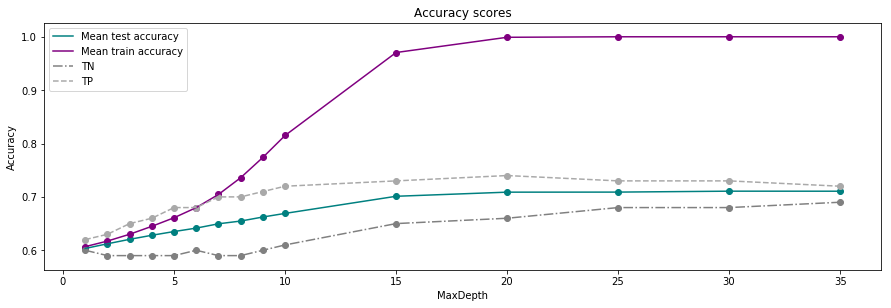

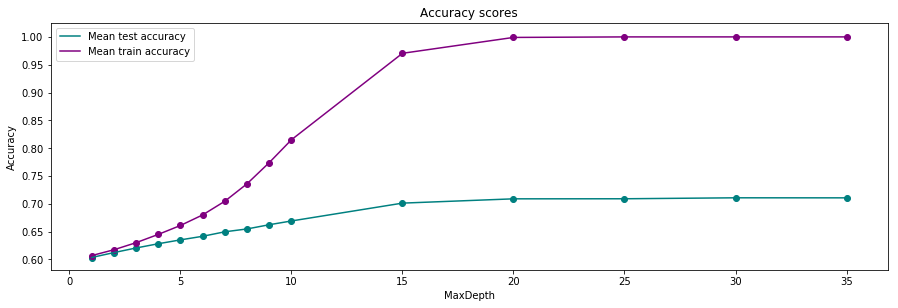

In [10]:
ax = plt.figure(figsize = (15,10)).add_subplot(211)
ax.plot(md, test, color = 'teal', label = 'Mean test accuracy')
ax.scatter(md, test, color = 'teal')
ax.plot(md, train, color = 'purple', label = 'Mean train accuracy')
ax.scatter(md, train, color = 'purple')
ax.plot(md, [i[0,0] for i in cnf], '-.',color = 'grey', label = 'TN')
ax.scatter(md, [i[0,0] for i in cnf], color = 'grey')
ax.plot(md, [i[1,1] for i in cnf], '--',color = 'darkgrey', label = 'TP')
ax.scatter(md, [i[1,1] for i in cnf],  color = 'darkgrey')
plt.legend()
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')
plt.title('Accuracy scores', fontsize = 12)

ax = plt.figure(figsize = (15,10)).add_subplot(212)
ax.plot(md, test, color = 'teal', label = 'Mean test accuracy')
ax.scatter(md, test, color = 'teal')
ax.plot(md, train, color = 'purple', label = 'Mean train accuracy')
ax.scatter(md, train, color = 'purple')
plt.legend()
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')
plt.title('Accuracy scores', fontsize = 12)
plt.show()

### Leaves

In [6]:
lv = [1,5,10, 15, 20, 25, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100, 120, 130, 140, 150, 160, 170, 180, 190, 200]

In [7]:
test_l = []
train_l = []
cnf_l = []
for i in lv:
    print()
    print('Leaves = ',i)
    m = Magnesium("set_minresol_N_5.csv", fold='input files/',colours = ['#f6c35b', '#929292'],
                 model = RandomForestClassifier(n_estimators=200, max_depth = 20, min_samples_leaf=i, 
                                                n_jobs=-1, criterion='gini'),  with_groups = False)
    data = m.compute(n_splits = 5, test_size = 0.3, plots = False, reduce_features = False, balanced = True)
    train_l.append(data['train score'])
    test_l.append(data['test score'])
    cnf_l.append(data['confusion'][1])


Maxdepth =  1
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.708597432147
Last score:  0.709410043881

Maxdepth =  5
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.705704534373
Last score:  0.702665366488

Maxdepth =  10
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.70253534861
Last score:  0.699089874858

Maxdepth =  15
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.696847066472
Last score:  0.691695108077

Maxdepth =  20
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.691955143832
Last score:  0.69055745165

Maxdepth =  25
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.684771656103
Last score:  0.679749715586

Maxdepth =  30
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.681830001625
Last score:  0.674223955794

Maxdepth =  40
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.676385503007
Last score:  0.671704859418

Maxdepth =  45
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.67289127255
Last score:  0.667966845441

Maxdepth =  50
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.671802372826
Last score:  0.664472614985

Maxdepth =  55
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.669722086787
Last score:  0.664310092638

Maxdepth =  60
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.668210628961
Last score:  0.660165772794

Maxdepth =  65
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.666276613034
Last score:  0.660572078661

Maxdepth =  70
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.663464976434
Last score:  0.659678205753

Maxdepth =  75
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.662619860231
Last score:  0.660409556314

Maxdepth =  80
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.663594994312
Last score:  0.657240370551

Maxdepth =  100
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.656395254347
Last score:  0.651795871932

Maxdepth =  120
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.652364700146
Last score:  0.649520559077

Maxdepth =  130
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.652137168861
Last score:  0.6457825451

Maxdepth =  140
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.652104664391
Last score:  0.650414431984

Maxdepth =  150
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.649032992036
Last score:  0.645863806273

Maxdepth =  160
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.646611409069
Last score:  0.640419307655

Maxdepth =  170
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.649715585893
Last score:  0.647895335609

Maxdepth =  180
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.64627011214
Last score:  0.642532098163

Maxdepth =  190
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.645571266049
Last score:  0.64269462051

Maxdepth =  200
(41020,)
(88877,)
Before:  (88877, 361)
After:  (41020, 361)


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"



Number of sites:  6153
Portion of sites:  0.5
Average score:  0.644872419958
Last score:  0.643019665204


### Save data

In [ ]:
h = open('outputs/balanced_test_l.txt', 'w')
h.write(' '.join([str(i) for i in test_l]))
h.close()

h = open('outputs/balanced_train_l.txt', 'w')
h.write(' '.join([str(i) for i in train_l]))
h.close()

h = open('outputs/balanced_cnf_l.txt', 'w')
h.write('\n'.join([' '.join([str(j) for j in i]) for i in cnf_l]))
h.close()

### Upload data

In [6]:
# Чтобы не прогонять расчеты, написанные выше каждый раз, я сохранила эти данные, 
# поэтому сейчас я могу работать с сохраненными данными.

test_l = [float(i) for i in open('outputs/balanced_test_l.txt').read().split()]
train_l = [float(i) for i in open('outputs/balanced_train_l.txt').read().split()]
cnf_l = open('outputs/balanced_cnf_l.txt').read().split('\n')
cnf_l =[np.array([float(j) for j in re.split('\[|\]|\s', i) if len(j)>0]).reshape(2,2) for i in cnf_l]   

lv = [1,5,10, 15, 20, 25, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100, 120, 130, 140, 150, 160, 170, 180, 190, 200]

### Plots

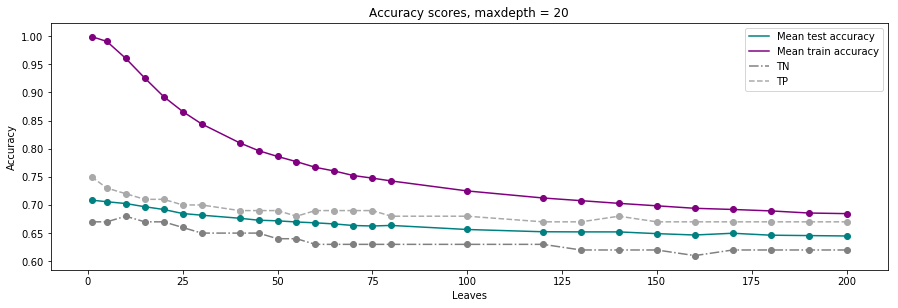

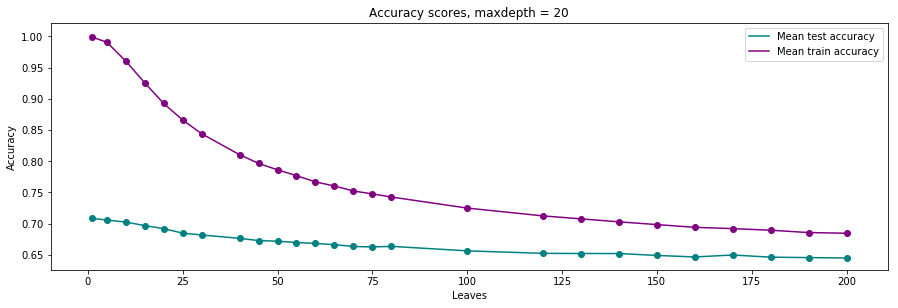

In [8]:
ax = plt.figure(figsize = (15,10)).add_subplot(211)
ax.plot(lv, test_l, color = 'teal', label = 'Mean test accuracy')
ax.scatter(lv, test_l, color = 'teal')
ax.plot(lv, train_l, color = 'purple', label = 'Mean train accuracy')
ax.scatter(lv, train_l, color = 'purple')
ax.plot(lv, [i[0,0] for i in cnf_l], '-.',color = 'grey', label = 'TN')
ax.scatter(lv, [i[0,0] for i in cnf_l], color = 'grey')
ax.plot(lv, [i[1,1] for i in cnf_l], '--',color = 'darkgrey', label = 'TP')
ax.scatter(lv, [i[1,1] for i in cnf_l],  color = 'darkgrey')
plt.legend()
plt.xlabel('Leaves')
plt.ylabel('Accuracy')
plt.title('Accuracy scores, maxdepth = 20', fontsize = 12)

ax = plt.figure(figsize = (15,10)).add_subplot(212)
ax.plot(lv, test_l, color = 'teal', label = 'Mean test accuracy')
ax.scatter(lv, test_l, color = 'teal')
ax.plot(lv, train_l, color = 'purple', label = 'Mean train accuracy')
ax.scatter(lv, train_l, color = 'purple')
plt.legend()
plt.xlabel('Leaves')
plt.ylabel('Accuracy')
plt.title('Accuracy scores, maxdepth = 20', fontsize = 12)
plt.show()

### Estimators

In [15]:
#estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400]
estimators = [425, 450, 475, 500]

In [16]:
#test_e = []
#train_e = []
#cnf_e = []
for i in estimators:
    print('estimator:', i)
    m = Magnesium("set_minresol_N_5_b_b.csv", fold='input files/',colours = ['#f6c35b', '#929292'],
                 model = RandomForestClassifier(n_estimators=i, n_jobs=-1, criterion='gini', 
                 max_depth = 20, min_samples_leaf=75),  with_groups = False)
    data = m.compute(n_splits = 5, test_size = 0.3, plots = False, reduce_features = False, balanced = True)
    train_e.append(data['train score'])
    test_e.append(data['test score'])
    cnf_e.append(data['confusion'][1])

estimator: 425
(26606,)
(62069,)
Before:  (62069, 361)
After:  (26606, 361)
Number of sites:  3991
Portion of sites:  0.5
Average score:  0.66319218241
Last score:  0.661738912553
estimator: 450
(26606,)
(62069,)
Before:  (62069, 361)
After:  (26606, 361)
Number of sites:  3991
Portion of sites:  0.5
Average score:  0.662941618642
Last score:  0.656602355299
estimator: 475
(26606,)
(62069,)
Before:  (62069, 361)
After:  (26606, 361)
Number of sites:  3991
Portion of sites:  0.5
Average score:  0.663517915309
Last score:  0.658732147331
estimator: 500
(26606,)
(62069,)
Before:  (62069, 361)
After:  (26606, 361)
Number of sites:  3991
Portion of sites:  0.5
Average score:  0.661964419945
Last score:  0.6589827111


### Save data

In [17]:
h = open('outputs/balanced_test_e.txt', 'w')
h.write(' '.join([str(i) for i in test_e]))
h.close()

h = open('outputs/balanced_train_e.txt', 'w')
h.write(' '.join([str(i) for i in train_e]))
h.close()

h = open('outputs/balanced_cnf_e.txt', 'w')
h.write('\n'.join([' '.join([str(j) for j in i]) for i in cnf_e]))
h.close()

### Upload data

In [18]:
# Чтобы не прогонять расчеты, написанные выше каждый раз, я сохранила эти данные, 
# поэтому сейчас я могу работать с сохраненными данными.

test_e = [float(i) for i in open('outputs/balanced_test_e.txt').read().split()]
train_e = [float(i) for i in open('outputs/balanced_train_e.txt').read().split()]
cnf_e = open('outputs/balanced_cnf_e.txt').read().split('\n')
cnf_e =[np.array([float(j) for j in re.split('\[|\]|\s', i) if len(j)>0]).reshape(2,2) for i in cnf_e]   

estimators = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]

### Plots

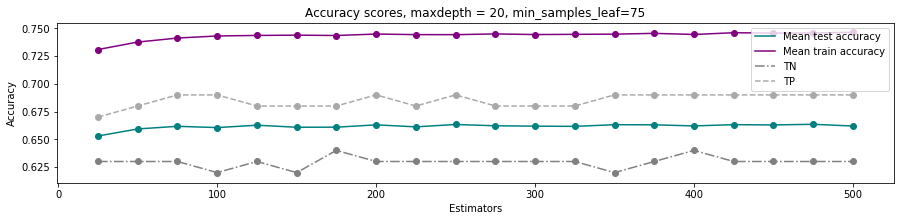

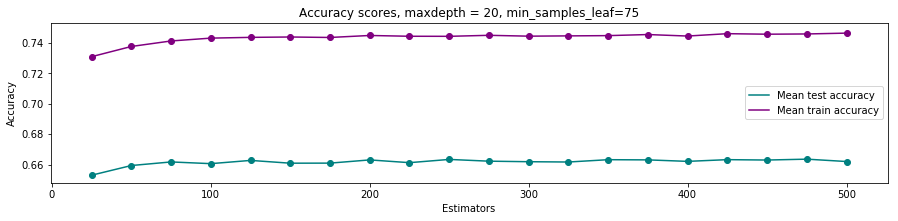

In [20]:
ax = plt.figure(figsize = (15,10)).add_subplot(311)
ax.plot(estimators, test_e, color = 'teal', label = 'Mean test accuracy')
ax.scatter(estimators, test_e, color = 'teal')
ax.plot(estimators, train_e, color = 'purple', label = 'Mean train accuracy')
ax.scatter(estimators, train_e, color = 'purple')
ax.plot(estimators, [i[0,0] for i in cnf_e], '-.',color = 'grey', label = 'TN')
ax.scatter(estimators, [i[0,0] for i in cnf_e], color = 'grey')
ax.plot(estimators, [i[1,1] for i in cnf_e], '--',color = 'darkgrey', label = 'TP')
ax.scatter(estimators, [i[1,1] for i in cnf_e],  color = 'darkgrey')
plt.legend()
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy scores, maxdepth = 20, min_samples_leaf=75', fontsize = 12)
plt.show()

ax = plt.figure(figsize = (15,10)).add_subplot(312)
ax.plot(estimators, test_e, color = 'teal', label = 'Mean test accuracy')
ax.scatter(estimators, test_e, color = 'teal')
ax.plot(estimators, train_e, color = 'purple', label = 'Mean train accuracy')
ax.scatter(estimators, train_e, color = 'purple')
plt.legend()
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy scores, maxdepth = 20, min_samples_leaf=75', fontsize = 12)


plt.show()